<a href="https://colab.research.google.com/github/soleildayana/Positional-Astronomy/blob/main/Tiempo_Sid%C3%A9reo_Local_AstroPosici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cálculo del Tiempo Sideral Local - Actividad 3 Astronomía de Posición**

*Soleil Dayana Niño Murcia 1033097666*

El tiempo sideral local es una medida de tiempo que se basa en la rotación de la Tierra con respecto a las estrellas fijas en el espacio. Esencialmente, es el tiempo medido por un observador ubicado en un punto específico de la Tierra en relación con las estrellas en el cielo.

Para calcular el tiempo sideral local, se toma como referencia el paso aparente del punto vernal (el punto en el cielo donde el Sol cruza el ecuador celeste en su movimiento anual) sobre el meridiano del observador. Este tiempo es importante en astronomía y navegación, ya que proporciona una referencia consistente y precisa para eventos astronómicos como la observación de estrellas, el seguimiento de movimientos planetarios y la planificación de misiones espaciales.

El tiempo sideral local también se utiliza en la corrección de datos astronómicos para su aplicación en la navegación marítima y aérea, así como en la sincronización de observaciones astronómicas precisas. En resumen, sirve como una herramienta fundamental para la coordinación y medición de eventos astronómicos desde diferentes ubicaciones en la Tierra.

In [ ]:
import numpy as np
import pandas as pd
f = 1.0027379 #factor de conversión
J2000 = 2451545

**Paso a Primer Reloj:**

In [ ]:
def Paso_a_1er_Reloj(time):
  if -24 < time < 0:
   time = time + 24
  else:
    time = time - np.floor(time/24)*24
  return time
def primer_reloj_TSG0(time):
  if time < 0:
    time = time - np.floor(time/24)*24
  else:
    time = time - np.floor(time/24)*24
  return time

**Toma de datos:**

Tener en cuenta que la medida de longitud de la ubicación, es positiva en Este y Negativa en oeste.

Para determinar el huso horario de su ubicación, tome de referencia la siguiente figura:

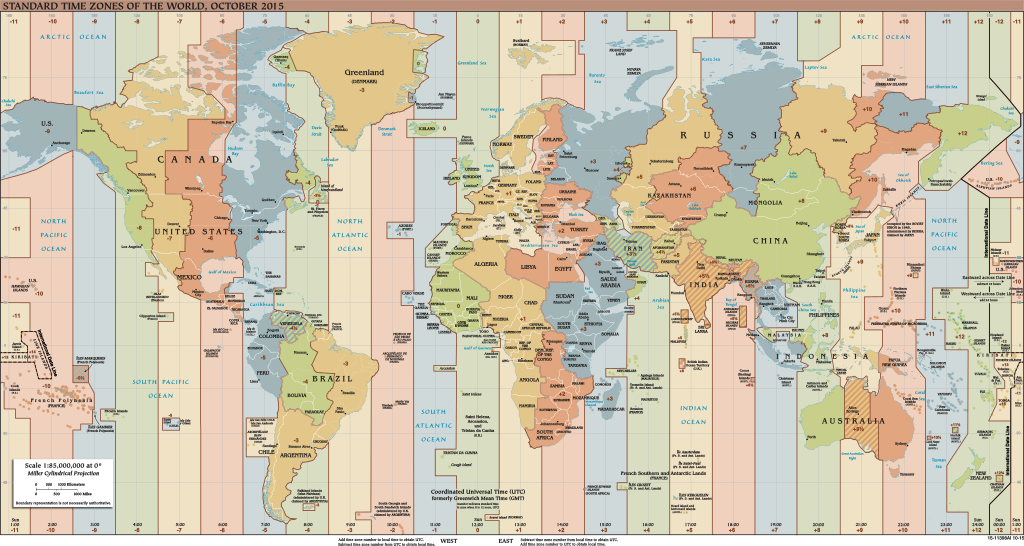

In [ ]:
lamb = float(input('Ingrese su longitud:', ))
time_zone = int(input('Ingrese el huso horario de su ubicación:', ))
hour = int(input('Ingrese su hora (sin minutos ni segundos):', ))
min = int(input('Ingrese los minutos de su hora:',))
sec= int(input('Ingrese los segundos de su hora:',))
legal_hour = hour + min/60 + sec/3600
A = int(input('Ingrese el año:', ))
M = int(input('Ingrese el mes:', ))
D = int(input('Ingrese el día:', ))

print ('Hora legal:', legal_hour)

Ingrese su longitud:-75
Ingrese el huso horario de su ubicación:-5
Ingrese su hora (sin minutos ni segundos):20
Ingrese los minutos de su hora:15
Ingrese los segundos de su hora:30
Ingrese el año:2015
Ingrese el mes:11
Ingrese el día:28
Hora legal: 20.258333333333333


**Tiempo Universal Coordinado (UTC):**



In [ ]:
UTC_= legal_hour - time_zone
UTC= Paso_a_1er_Reloj(UTC_)
print('Tiempo Universal:',UTC)

Tiempo Universal: 1.2583333333333329


**Cálculo del día juliano:**

(Método tomado de Elementos de Astronomía de Posición, Portilla, 2009)

In [ ]:
if M==2 or M==1:
  M+= 12
  A-=1
JD = np.floor(365.25*(A+4716))+np.floor(30.6001*(M+1))-np.floor(A/100)+np.floor(np.floor(A/100)/4)+D-1522.5
print(JD)

2457354.5


In [ ]:
T_= (JD- J2000)/36525
T = Paso_a_1er_Reloj(T_)
#Tiempo Sideral en Greenwich a las Oh UTC
TSG0_ = (24110.54841 + 8640184.813 * T + 0.09310 * T **2)/3600
TSG0 = Paso_a_1er_Reloj(TSG0_) #pasar a primer reloj y convertir a horas
#Tiempo Sideral en Gree
TSG_= TSG0+(UTC*f)
TSG = Paso_a_1er_Reloj(TSG_)
#Tiempo Sideral Local
TSL_ = TSG + (lamb/15)
TSL = Paso_a_1er_Reloj(TSL_)
#Pasando TSL a formato de horas:
hr_TSL = int(TSL)
min_TSL = (TSL - int(TSL))*60
min_ent_TSL = int(min_TSL)
sec_TSL =  int((min_TSL - min_ent_TSL )*60)

print('Su hora sideral local (o ángulo horario del punto Vernal) es:', hr_TSL, 'h', min_ent_TSL, 'min', sec_TSL, 's.')

Su hora sideral local (o ángulo horario del punto Vernal) es: 0 h 42 min 1 s.
